In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
#examine the data
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
missing_val_count_by_column = (train_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The corr() function shows correlation between the numerical features. It looks like Fare had a slight impact on Survivability

Text(0.5, 1.0, 'count of dead vs survivors ')

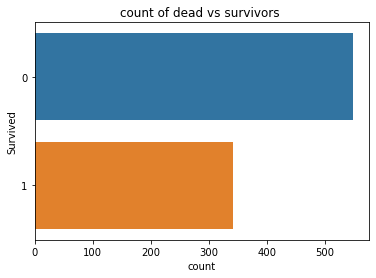

In [9]:
import seaborn as sns
sns.countplot(y=train_data['Survived']).set_title('count of dead vs survivors ')

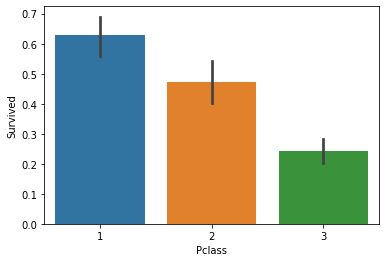

In [10]:
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])

The Pclass (socio-economic status) also effected survivability positively

Text(0, 0.5, 'Survival rate')

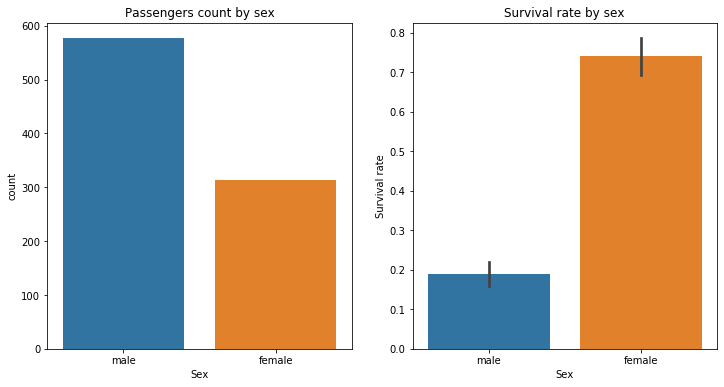

In [11]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(train_data['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
sns.barplot(x='Sex', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [12]:
train_data.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

Text(0, 0.5, 'Survival rate')

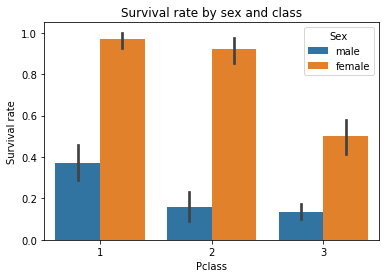

In [13]:
#Females in 1st and 2nd class are very likely to have survived. 
plt.title('Survival rate by sex and class')
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data).set_ylabel('Survival rate')

c:\users\lnimmagadda\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
c:\users\lnimmagadda\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


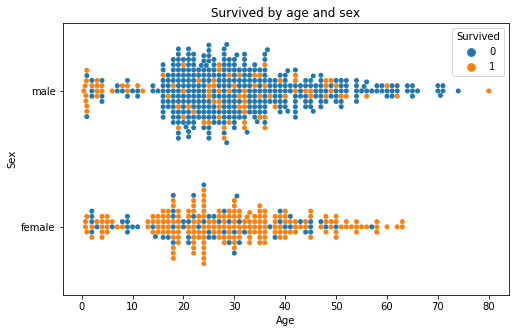

In [14]:
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=train_data).set_title('Survived by age and sex')

The above graph shows us that males under 12 were more likely to survive than males older than 12. No such trend exists for females . Females are likely to survive across all age groups.

In [15]:
train_data['IsKid'] = train_data.Age.map(lambda i : i<12)
test_data['IsKid'] = test_data.Age.map(lambda i : i<12)

In [16]:
train_no_null_age = train_data[train_data['Age'].notna()]
train_no_null_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
 12  IsKid        714 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 73.2+ KB


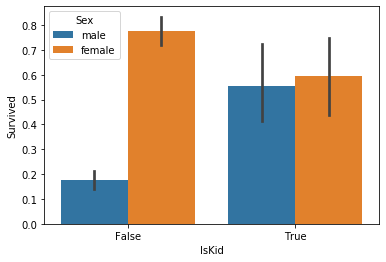

In [17]:
sns.barplot(x =train_no_null_age['IsKid'] , y =train_data ['Survived'], hue=train_data['Sex'])

In [18]:
import missingno as msno

c:\users\lnimmagadda\appdata\local\programs\python\python38\lib\site-packages\missingno\missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


Text(0.5, 1.0, 'Test data')

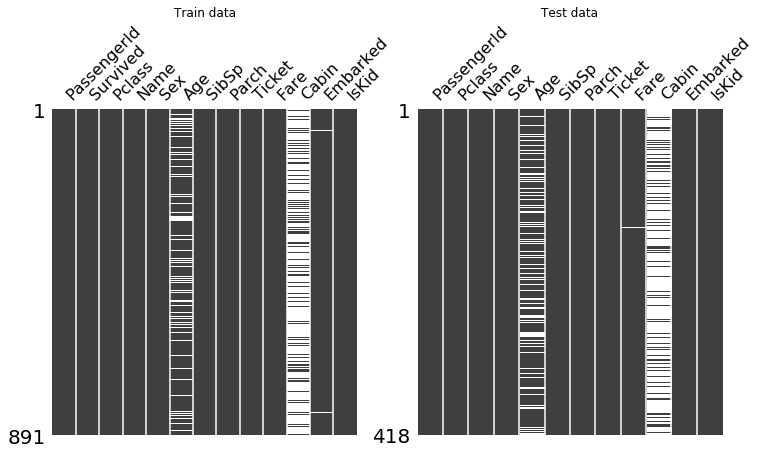

In [19]:
# This graph shows us the missing records for each colomn as a white line
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
msno.matrix(train_data,ax=axarr[0]).set_title('Train data')
msno.matrix(test_data,ax=axarr[1]).set_title('Test data')
#plt.show()

In [20]:
(train_data['Fare']==0).sum()

15

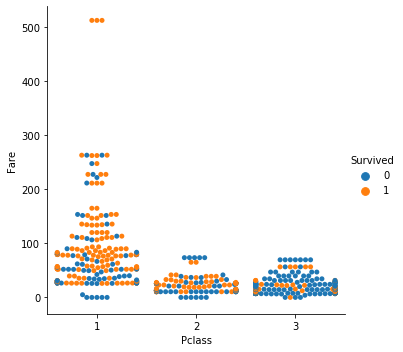

In [21]:
sns.catplot(x="Pclass", y="Fare",hue='Survived', kind="swarm", data=train_data)
plt.show()

In [22]:
# Fare clearly has a positive effect on survival rates. But people with who paid the same fare 
# to get into pclass 1 had better survival rates than pclass 3. 
# get data where age is not null

clean_train_data = train_data.copy()
clean_train_data  = clean_train_data.dropna(subset = ['Age'])
print(clean_train_data.shape)
clean_test_data = test_data.copy()
clean_test_data = clean_test_data.dropna(subset = ['Age'])
print(clean_test_data.shape)

(714, 13)
(332, 12)


In [23]:
combined_data = clean_train_data.append(clean_test_data)

combined_data.shape

(1046, 13)

In [24]:
combined_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsKid
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,True
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,False
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,False
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,False


In [25]:
import re
def getTitle(txt):
    x = re.findall("([A-Za-z]+)\.", txt)[0]
    return x

In [26]:
combined_data['Title'] = combined_data['Name'].apply(getTitle)
train_data['Title'] = train_data['Name'].apply(getTitle)
test_data['Title'] = test_data['Name'].apply(getTitle)

In [27]:
combined_data['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
409    Miss
411     Mrs
412    Miss
414    Dona
415      Mr
Name: Title, Length: 1046, dtype: object

In [28]:
grouped = combined_data.groupby('Title')

In [29]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [30]:
grouped.groups

{'Capt': Int64Index([745], dtype='int64'),
 'Col': Int64Index([647, 694, 131, 202], dtype='int64'),
 'Countess': Int64Index([759], dtype='int64'),
 'Don': Int64Index([30], dtype='int64'),
 'Dona': Int64Index([414], dtype='int64'),
 'Dr': Int64Index([245, 317, 398, 632, 660, 796, 293], dtype='int64'),
 'Jonkheer': Int64Index([822], dtype='int64'),
 'Lady': Int64Index([556], dtype='int64'),
 'Major': Int64Index([449, 536], dtype='int64'),
 'Master': Int64Index([  7,  16,  50,  59,  63,  78, 125, 164, 165, 171, 182, 183, 193,
             261, 278, 305, 340, 348, 386, 407, 445, 480, 489, 549, 751, 755,
             787, 788, 802, 803, 819, 824, 827, 831, 850, 869,  21,  55,  64,
              80,  89, 154, 161, 192, 194, 196, 201, 281, 307, 360, 379, 389,
             392],
            dtype='int64'),
 'Miss': Int64Index([  2,  10,  11,  14,  22,  24,  38,  39,  43,  44,
             ...
             354, 367, 371, 375, 376, 385, 400, 402, 409, 412],
            dtype='int64', length=210)

In [31]:
grouped.size()

Title
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       53
Miss        210
Mlle          2
Mme           1
Mr          581
Mrs         170
Ms            1
Rev           8
Sir           1
dtype: int64

In [32]:
grouped.get_group('Mr')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsKid,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False,Mr
12,13,0.0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,False,Mr
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,False,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,False,Mr
405,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,False,Mr
406,1298,NaN,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S,False,Mr
407,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,False,Mr


In [33]:
print(grouped.get_group('Mr').Age.median())
print(grouped.get_group('Master').Age.median())
print(grouped.get_group('Miss').Age.median())
print(grouped.get_group('Mrs').Age.median())
print(combined_data.Age.median())

29.0
4.0
22.0
35.5
28.0


In [34]:
import math
def fillerAge(row):
    if(not(math.isnan(row['Age']))):
        return row['Age']
    else:
        if(row['Title'] == "Mr"):
            return 29
        if(row['Title'] == "Master"):
            return 4
        if(row['Title'] == "Miss"):
            return 22
        if(row['Title'] == "Mrs"):
            return 36
        else:
            return 29      

In [35]:
train_data['Age'] = train_data.apply(fillerAge, axis=1) 

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  IsKid        891 non-null    bool   
 13  Title        891 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 91.5+ KB


In [37]:
test_data['Age'] = test_data.apply(fillerAge, axis=1)

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  IsKid        418 non-null    bool   
 12  Title        418 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 39.7+ KB


In [39]:
train_data['IsKid'] = train_data.Age.map(lambda i : i<12)

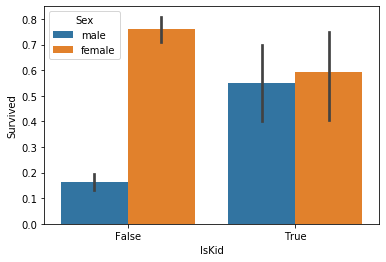

In [40]:
sns.barplot(x =train_data['IsKid'] , y =train_data ['Survived'], hue=train_data['Sex'])

Text(0.5, 1.0, 'actual data')

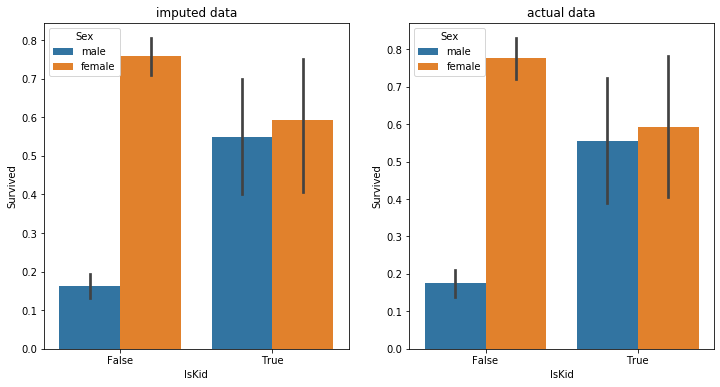

In [41]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
sns.barplot(x =train_data['IsKid'] , y =train_data ['Survived'], hue=train_data['Sex'], ax=axarr[0])
axarr[0].set_title('imputed data')
sns.barplot(x =train_no_null_age['IsKid'] , y =train_no_null_age ['Survived'], hue=train_no_null_age['Sex'], ax =axarr[1])
axarr[1].set_title('actual data')
# The side by side comparision shows no difference . how is this possible?

In [42]:
train_data.info()
train_no_null_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  IsKid        891 non-null    bool   
 13  Title        891 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
--- 

In [43]:
print(train_data['IsKid'].sum())
train_no_null_age['IsKid'].sum()

72


68

In [44]:
print(72/891)
print(68/714)

0.08080808080808081
0.09523809523809523


This tells us that the proportion of kids in the actual data and imputed data is actually very 
close. So the above graphs are very close but not identical.
For males , kids had greater than a 50% chance of survival while adults had around 15%. Interestingly, females over the age of 12 had a better chance of survival than under 12. 

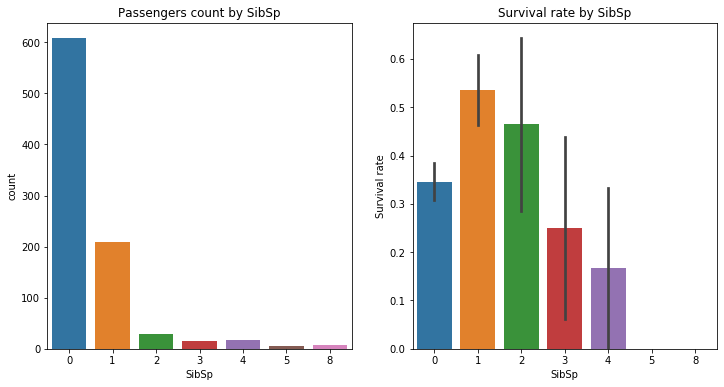

In [46]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['SibSp'], ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

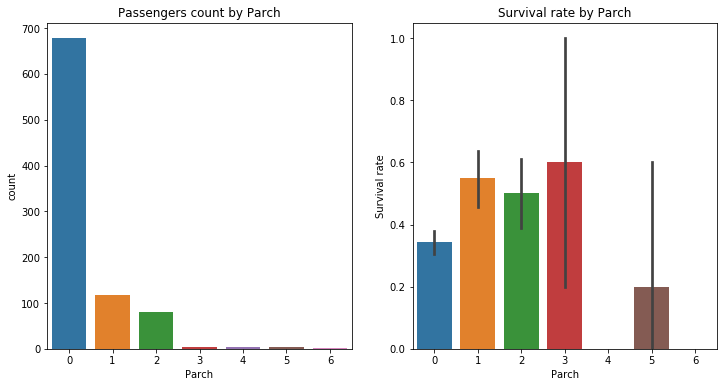

In [47]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [48]:
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1

Text(0, 0.5, 'Survival rate')

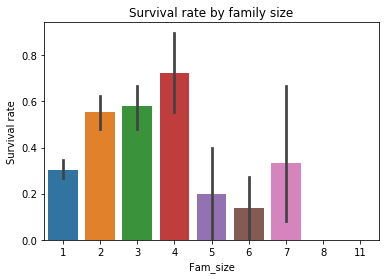

In [49]:
plt.title('Survival rate by family size')
sns.barplot(x=train_data.Fam_size, y=train_data.Survived).set_ylabel('Survival rate')

In [50]:
train_data['Cabin'].fillna("Unknown", inplace= True)
test_data['Cabin'].fillna('Unknown', inplace= True)

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  IsKid        891 non-null    bool   
 13  Title        891 non-null    object 
 14  Fam_size     891 non-null    int64  
dtypes: bool(1), float64(2), int64(6), object(6)
memory usage: 98.4+ KB


In [52]:
train_data['deck']=train_data['Cabin'].str.split('',expand=True)[1]
test_data['deck']=test_data['Cabin'].str.split('',expand=True)[1]

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsKid,Title,Fam_size,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,False,Mr,2,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,Mrs,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,False,Miss,1,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,Mrs,2,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,False,Mr,1,U


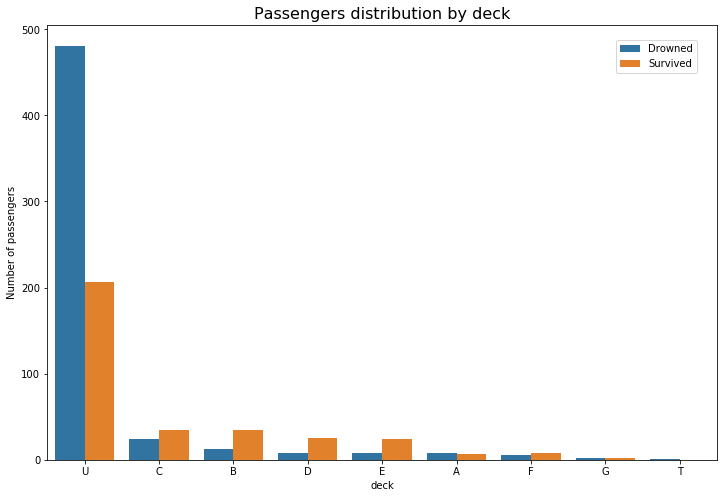

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(x=train_data['deck'],data=train_data,hue='Survived',order = train_data['deck'].value_counts().index)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(0.85,0.89))
plt.xticks(rotation = False)


plt.show()

Text(0, 0.5, 'Survival rate')

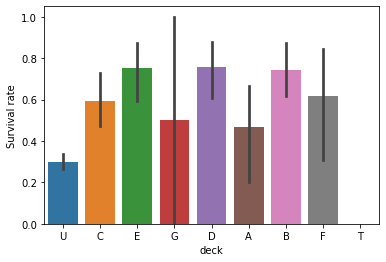

In [55]:
sns.barplot(x='deck', y='Survived', data=train_data).set_ylabel('Survival rate')

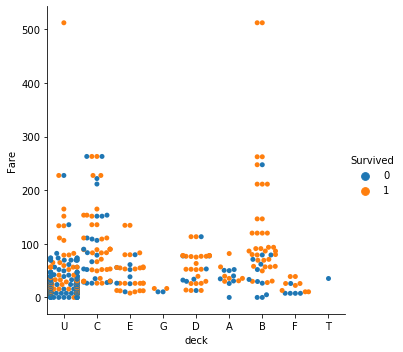

In [56]:
sns.catplot(x="deck", y="Fare",hue='Survived', kind="swarm", data=train_data)
plt.show()

Text(0.5, 1.0, 'Survivors and deads count by boarding point')

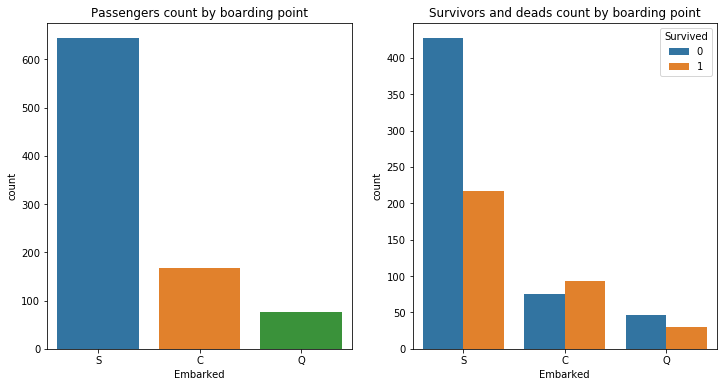

In [57]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')

In [58]:
# Need to impute values in the Embarked colomn for the label encoder to work
def fill_Embarked(row):
    
    if(type(row['Embarked']) == type("bla")):
        return row['Embarked']
    else:
        return "S"
    


In [59]:
train_data['Embarked'] = train_data.apply(fill_Embarked, axis=1)
test_data['Embarked'] = test_data.apply(fill_Embarked, axis=1)

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  IsKid        891 non-null    bool   
 13  Title        891 non-null    object 
 14  Fam_size     891 non-null    int64  
 15  deck         891 non-null    object 
dtypes: bool(1), float64(2), int64(6), object(7)
memory usage: 105.4+ KB


In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  IsKid        418 non-null    bool   
 12  Title        418 non-null    object 
 13  Fam_size     418 non-null    int64  
 14  deck         418 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 46.3+ KB


In [62]:
le = LabelEncoder() 
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])

In [63]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsKid,Title,Fam_size,deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S,False,Mr,2,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,False,Mrs,2,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,False,Miss,1,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,Mrs,2,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S,False,Mr,1,U


In [64]:
from sklearn import preprocessing
encoder=preprocessing.OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame (encoder.fit_transform(train_data[['Embarked']]))
train_X_encoded.columns = encoder.get_feature_names(['Embarked'])
train_data.drop(['Embarked'] ,axis=1, inplace=True)
train_data= pd.concat([train_data, train_X_encoded ], axis=1)

test_X_encoded = pd.DataFrame (encoder.transform(test_data[['Embarked']]))
test_X_encoded.columns = encoder.get_feature_names(['Embarked'])
test_data.drop(['Embarked'] ,axis=1, inplace=True)
test_data= pd.concat([test_data, test_X_encoded ], axis=1)

In [65]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,IsKid,Title,Fam_size,deck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,False,Mr,2,U,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,Mrs,2,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,False,Miss,1,U,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,Mrs,2,C,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,False,Mr,1,U,0.0,0.0,1.0


In [66]:
encoder=preprocessing.OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame (encoder.fit_transform(train_data[['deck']]))
train_X_encoded.columns = encoder.get_feature_names(['deck'])
train_data.drop(['deck'] ,axis=1, inplace=True)
train_data= pd.concat([train_data, train_X_encoded ], axis=1)

test_X_encoded = pd.DataFrame (encoder.transform(test_data[['deck']]))
test_X_encoded.columns = encoder.get_feature_names(['deck'])
test_data.drop(['deck'] ,axis=1, inplace=True)
test_data= pd.concat([test_data, test_X_encoded ], axis=1)

In [67]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_U
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'IsKid', 'Title', 'Fam_size',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'deck_A', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'deck_U'],
      dtype='object')

Now we run ML models.
Use K fold cross validation since we dont have actual test data

In [69]:
# Demo of kfold
X = np.array([[33, 32], [23, 24], [15, 9], [21, 6], [51,52]])
y = np.array([1, 2, 3, 4,5])
# y needs to have same number of rows as X
print("X is \n",X)
kf = KFold(n_splits=2)


print(kf)

for train_index, test_index in kf.split(X):
    print("Next Round")
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print("X_train is :",X_train,"\n X_test is:", X_test)
    y_train, y_test = y[train_index], y[test_index]
    print("y_train is: ",y_train,"\n y_test is:", y_test)

X is 
 [[33 32]
 [23 24]
 [15  9]
 [21  6]
 [51 52]]
KFold(n_splits=2, random_state=None, shuffle=False)
Next Round
TRAIN: [3 4] TEST: [0 1 2]
X_train is : [[21  6]
 [51 52]] 
 X_test is: [[33 32]
 [23 24]
 [15  9]]
y_train is:  [4 5] 
 y_test is: [1 2 3]
Next Round
TRAIN: [0 1 2] TEST: [3 4]
X_train is : [[33 32]
 [23 24]
 [15  9]] 
 X_test is: [[21  6]
 [51 52]]
y_train is:  [1 2 3] 
 y_test is: [4 5]


In [70]:
X = train_data[['Age', 'Sex', 'Pclass','Fare','Fam_size', 'Embarked_Q','Embarked_S',
                'Embarked_C','deck_A', 'deck_B', 'deck_C','deck_D', 'deck_E', 'deck_F', 
                'deck_G', 'deck_T', 'deck_U']].to_numpy()
y = train_data['Survived'].to_numpy()
print(len(X), len(y))
print(len(X), len(y))
kf = KFold(n_splits=6)
# print(kf.get_n_splits(X))

print(kf)
acc_decision_tree=0

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    decision_tree = DecisionTreeClassifier()
    # the decision tree algo should be fit and predictions made inside this loop
    decision_tree.fit(X_train, y_train)
    #Y_pred_decision_tree = decision_tree.predict(X_test)
    acc_decision_tree =acc_decision_tree+ round(decision_tree.score(X_test, y_test) * 100, 2)

print("Average accuracy of Decision Tree is :", acc_decision_tree/6)


891 891
891 891
KFold(n_splits=6, random_state=None, shuffle=False)
Average accuracy of Decision Tree is : 78.23166666666667


In [71]:
#logistic regression
acc_log = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    #Y_pred_log = logreg.predict(X_test)
    acc_log = acc_log +round(logreg.score(X_test, y_test) * 100, 2)
print("Average accuracy of logistic regression is: ",acc_log/6)

c:\users\lnimmagadda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\lnimmagadda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Average accuracy of logistic regression is:  79.12666666666668


c:\users\lnimmagadda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\lnimmagadda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [72]:
#KNN
acc_knn = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    #Y_pred_knn = knn.predict(X_test)
    acc_knn = acc_knn + round(knn.score(X_test, y_test) * 100, 2)
print("Average accuracy of KNN is: ",acc_knn/6)

Average accuracy of KNN is:  69.81833333333333


In [73]:
#SVM
acc_svc = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc = SVC()
    svc.fit(X_train, y_train)
    #Y_pred_svc = svc.predict(X_test)
    acc_svc = acc_svc + round(svc.score(X_test, y_test) * 100, 2)
print("Average accuracy of SVM is: ",acc_svc/6)

Average accuracy of SVM is:  66.78666666666666


In [74]:
#Gaussian
acc_GNB = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    acc_GNB = acc_GNB+ round(gaussian.score(X_test, y_test) * 100, 2)
print("Average accuracy of GNB is: ",acc_GNB/6)

Average accuracy of GNB is:  71.285


In [75]:
#Random Forest
acc_RF = 0
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train, y_train)
    acc_RF = acc_RF+ round(random_forest.score(X_test, y_test) * 100, 2)

print("Average accuracy of RF is: ",acc_RF/6)

Average accuracy of RF is:  79.57666666666667


In [76]:
#test data contains null values, so impute with median
# median_age = test_data['Age'].median()
# test_data.Age.fillna(median_age, inplace=True)
median_fare = test_data['Fare'].median()
test_data.Fare.fillna(median_fare, inplace = True)

In [77]:
criterion= ['gini', 'entropy']
max_depth = [1, 3, 5, 10, None]

model = RandomForestClassifier(n_estimators=100)
grid = GridSearchCV(estimator = model, cv =3, param_grid =dict(criterion = criterion, max_depth = max_depth))

In [78]:
grid.fit(train_data[['IsKid', 'Sex', 'Pclass','Fare','Fam_size', 'Embarked_Q','Embarked_S',
                'Embarked_C','deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 
                     'deck_G', 'deck_T', 'deck_U']], train_data['Survived'])

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [79]:
print(grid.best_score_)
print(grid.best_params_)

0.8136924803591471
{'criterion': 'gini', 'max_depth': 5}


Trying XGBoost

In [80]:
from sklearn.model_selection import train_test_split
y=train_data['Survived']
X = train_data[['Age', 'Sex', 'Pclass','Fare','Fam_size', 'Embarked_Q','Embarked_S',
                'Embarked_C','deck_A', 'deck_B', 'deck_C','deck_D', 'deck_E', 'deck_F', 
                'deck_G', 'deck_T', 'deck_U']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=123)

In [81]:
train_X

,Age,Sex,Pclass,Fare,Fam_size,Embarked_Q,Embarked_S,Embarked_C,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_U
329,16.0,0,1,57.9792,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,31.0,1,3,7.7500,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203,45.5,1,3,7.2250,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
421,21.0,1,3,7.7333,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,23.0,1,1,63.3583,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,34.0,0,2,23.0000,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
322,30.0,0,2,12.3500,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
382,32.0,1,3,7.9250,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
365,30.0,1,3,7.2500,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
test_X

,Age,Sex,Pclass,Fare,Fam_size,Embarked_Q,Embarked_S,Embarked_C,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_U
172,1.0,0,3,11.1333,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
524,29.0,1,3,7.2292,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
452,30.0,1,1,27.7500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
170,61.0,1,1,33.5000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
620,27.0,1,3,14.4542,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,29.0,1,3,7.7292,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
338,45.0,1,3,8.0500,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
827,1.0,1,2,37.0042,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
773,29.0,1,3,7.2250,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [83]:
train_y

329    1
749    0
203    0
421    0
97     1
      ..
98     1
322    1
382    0
365    0
510    1
Name: Survived, Length: 712, dtype: int64

In [84]:
test_y

172    1
524    0
452    0
170    0
620    0
      ..
388    0
338    1
827    1
773    0
221    0
Name: Survived, Length: 179, dtype: int64

In [90]:
import xgboost as xgb
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3}
steps =20

In [91]:
D_train = xgb.DMatrix(train_X, label=train_y)
D_test = xgb.DMatrix(test_X, label=test_y)

In [92]:
model = xgb.train(param, D_train, steps)

In [93]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(test_y, best_preds, average='macro')))
print("Recall = {}".format(recall_score(test_y, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(test_y, best_preds)))

Precision = 0.8309041835357625
Recall = 0.8309041835357625
Accuracy = 0.8435754189944135


In [94]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(train_X, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.

In [100]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
predictions = grid.predict(test_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))
print("root mean square error: " + str (math.sqrt(mean_squared_error(test_y, predictions))))
print("Accuracy = {}".format(accuracy_score(test_y, predictions)))

Mean Absolute Error : 0.15083798882681565
root mean square error: 0.38837866680189276
Accuracy = 0.8491620111731844


In [97]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# a=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# b=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# fig =plt.figure(figsize=(20,12),dpi=50)
# fpr, tpr, thresholds = roc_curve(test_y,predictions )
# plt.plot(fpr, tpr,color ='orange',label ='XGBoost',linewidth=2 )


# plt.plot(a,b,color='black',linestyle ='dashed',linewidth=2)
# plt.legend(fontsize=15)
# plt.xlabel('False Positive Rate',fontsize=15)
# plt.ylabel('True Positive Rate',fontsize=15)

In [296]:
#XG boost now has the highest accuracy, so make predictions on the actual test data instead of 
# the one obtained from train_test_split of training data.

In [101]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'IsKid', 'Title', 'Fam_size', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'deck_T', 'deck_U'],
      dtype='object')

In [102]:
X_test = test_data[['Age', 'Sex', 'Pclass','Fare','Fam_size', 'Embarked_Q','Embarked_S',
                'Embarked_C','deck_A', 'deck_B', 'deck_C','deck_D', 'deck_E', 'deck_F', 
                'deck_G', 'deck_T', 'deck_U']]
X_train = train_data[['Age', 'Sex', 'Pclass','Fare','Fam_size', 'Embarked_Q','Embarked_S',
                'Embarked_C','deck_A', 'deck_B', 'deck_C','deck_D', 'deck_E', 'deck_F', 
                'deck_G', 'deck_T', 'deck_U']]
y_train = train_data['Survived']
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.

In [105]:
predictions = grid.predict(X_test)

In [106]:
print(len(test_data),  len(predictions))

418 418


In [107]:
# Using XGBoost because it has the highest training accuracy
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('my_submission.csv', index=False)

Since random forest has the highest accuracy , We use it to make predictions -- OLDER SUBMISSION

In [168]:
# X_test = test_data[['IsAdult', 'IsMale', 'Pclass','Fare','Fam_size', 'Embarked_Q','Embarked_S',
#                 'Embarked_C']]
# X_train = train_data[['IsAdult', 'IsMale', 'Pclass','Fare','Fam_size', 'Embarked_Q','Embarked_S',
#                 'Embarked_C']]
# y_train = train_data['Survived']
# random_forest = RandomForestClassifier(n_estimators=100, criterion= 'entropy', max_depth = 5)
# random_forest.fit(X_train, y_train)
# y_pred_RF = random_forest.predict(X_test)

In [169]:
# print(len(test_data),  len(y_pred_RF))

418 418


In [170]:
# # Using decision tree because it has the highest training accuracy
# submission = pd.DataFrame({
#         "PassengerId": test_data["PassengerId"],
#         "Survived": y_pred_RF
#     })
# submission.to_csv('submission.csv', index=False)

In [131]:
# train_data.shape, test_data.shape

((891, 18), (418, 15))